# What Makes a Successful Horror Film?
Group-1: Xiaofan Fan, Tianyu Li, Wenxin Zhang

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpl
%matplotlib inline

## File Reading and Data Cleaning
FILE DESCRIPTION HERE!!!!!!!!!!!!

To describe:
1. data contained....
2. how we got the data (where we scraped the data)
3. show head(5)

In [449]:
# READ FILES
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")
all_rate = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/allrate.csv")
age_group = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/age_group.csv")
male = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/malespider.csv")
female = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/femalespider.csv")
budget_read = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/budget.csv")

## 1. Film Release Year & Rating
People often think that most top-rated horror movies are the classic old movies. So, for the first part, we want to figure out whether old horror movies are better than modern horror movies.

In [450]:
main_rank = pd.merge(ranking, mainpage, on = ["Name", "Year"])

### 1.1. Film Release Trend by Year
show the number of horror movies for each year with a bar chart to get a brief understanding about the trend

Text(0.5, 0, 'Year')

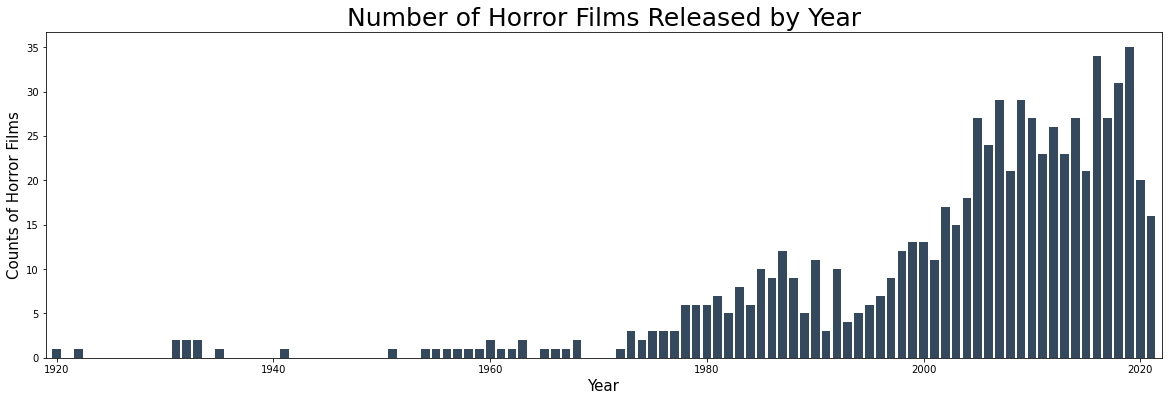

In [451]:
release_count = main_rank[["Year", "Rate"]].groupby(['Year']).count().reset_index().rename(columns={'Rate':'Count'})

fig, ax = plt.subplots(1, 1, figsize = (20,6))
ax.bar(
    x = release_count['Year'],
    height = release_count['Count'],
    color = '#34495E'
)
plt.xlim(1919, 2022)
plt.title("Number of Horror Films Released by Year", size = 25)
ax.set_ylabel("Counts of Horror Films", size = 15)
ax.set_xlabel("Year", size = 15)

### 1.2. Film Rating Trend by Year
by using the scatter plot with release year on the horizontal axis and rating scores on the vertical axis, we will add the best fit line as the rating trend of all horror movies over time

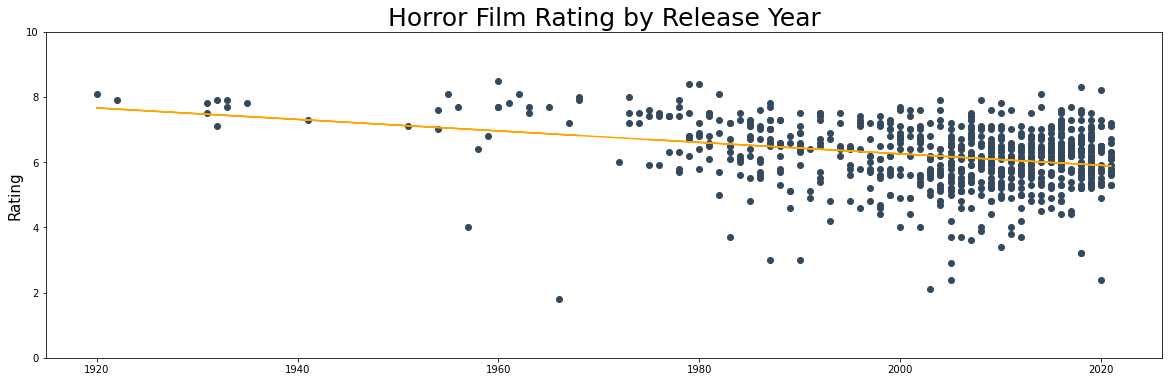

In [452]:
release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()

fig, ax = plt.subplots(1, 1, figsize = (20,6))
x = np.array(mainpage['Year'])
y = np.array(mainpage['Rate'])
m, b = np.polyfit(x, y, 1)
plt.ylim(0, 10)
ax.set_ylabel('Rating', size = 15)
plt.title('Horror Film Rating by Release Year', size = 25)
plt.plot(x, y, 'o', color = '#34495E')
plt.plot(x, m*x + b, color = 'orange')

## 2. Genre & Rating


In [453]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

mainpage["Genre_list"] =mainpage.apply(lambda x : stringToList(x["Genre"]),axis=1)
mainpage.head()

,Name,Year,Rate,Genre,Country,Genre_list
0,Deep Red,1975,7.6,"Horror,Mystery,Thriller",Italy,"[Horror, Mystery, Thriller]"
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,"[Horror, Mystery, Thriller]"
2,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,"[Horror, Mystery, Thriller]"
3,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,"[Drama, Horror, Sci-Fi]"
4,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,"[Drama, Fantasy, Horror, Mystery]"


In [454]:
#count the total number of films of each genre
a = pd.Series(np.concatenate(mainpage.Genre_list))
Genre_count = pd.DataFrame({"Frequency":a.value_counts()}).rename(index={"Horror":"Total Number"})
Genre_count["Propotion"] =Genre_count["Frequency"]/Genre_count["Frequency"][0]*100  #calculate percentage for each genre
Genre_count= Genre_count.drop(index='Total Number')
Genre_count["Propotion"] = Genre_count["Propotion"].apply(lambda x: float("{:.2f}".format(x)))
Genre_count.head(10)

,Frequency,Propotion
Thriller,439,60.14
Mystery,270,36.99
Drama,187,25.62
Sci-Fi,178,24.38
Fantasy,136,18.63
Action,131,17.95
Comedy,108,14.79
Adventure,66,9.04
Crime,47,6.44
Romance,27,3.70


### Color Dictionary
We created a color Dictionary to specify a color for each subgenre for the following discussion.

In [455]:
number = Genre_count.index.value_counts().sum()
print(f"On IMDb we can find {number} sub-genres for horror films.")

On IMDb we can find 18 sub-genres for horror films.


In [456]:
colors_list = {
       'Horror' : '#34495E',
       'Thriller' : '#1A5276',
       'Mystery' : '#EC7063',
       'Drama' : '#DC7633',
       'Sci-Fi' : '#EB984E',
       'Fantasy' : '#F5B041',
       'Action' : '#F4D03F',
       'Comedy' : '#58D68D',
       'Adventure' : '#52BE80',
       'Crime' : '#45B39D',
       'Romance' : '#48C9B0',
       'Family' : '#5DADE2',
       'Animation' : '#5499C7',
       'Western' : '#A569BD',
       'War' : '#AF7AC5',
       'Musical' : '#9FE2BF',
       'History' : '#DE3163',
       'Music' : '#7D3C98',
       'Biography' : '#CD6155'
       }

Plot color dictionary

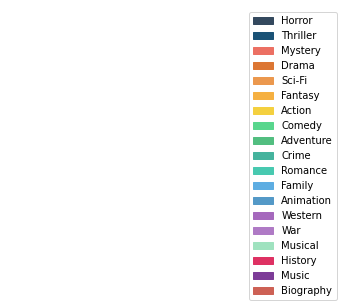

In [457]:
handles = [mpl.Patch(color=colors_list[x], label=x) for x in colors_list.keys()]
# Create legend
plt.legend(handles=handles)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()

### 2.1. Proportion of Genre
First, we will count the total number of films of each genre, and create a pie chart to show their proportions (e.g. among all 723 films, 40% are drama, 30% are adventure, etc.).

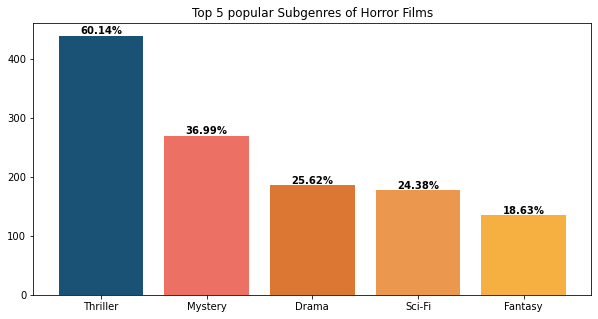

In [458]:
Genre_count['Genre'] =Genre_count.index
Genre_count_top5 = Genre_count.head(5)
plt.figure(figsize=(10,5))
c = Genre_count['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_count_top5.Genre,Genre_count_top5.Frequency, color = c)
plt.title('Top 5 popular Subgenres of Horror Films')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_count.Propotion[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

### 2.2. Ratings by Genre
Then, we will produce a bar chart with tags of film genres on the horizontal axis, and average user ratings on the vertical axis. This bar chart would show which genre is top rated by IMDb users.

In [459]:
# Function to Calculate Average Rating by Genre
def genre_avgRating (genre):
    total_rating=0
    count=0
    for list in mainpage["Genre_list"]:
        i = mainpage["Genre_list"].tolist().index(list)
        if genre in list:
            total_rating = total_rating + mainpage["Rate"][i]
            count += 1
    return float("{:.2f}".format(total_rating / count))

In [460]:
# get average rating of each film genre
a = pd.Series(np.concatenate(mainpage.Genre_list)).value_counts().index.tolist()
b = pd.DataFrame({'Genre' : a})
b['avg_rating'] = ""
for genre in b['Genre']:
    i = b['Genre'].tolist().index(genre)
    b['avg_rating'][i] = genre_avgRating(genre)
Genre_Rating = b.sort_values(by='avg_rating', ascending=False).reset_index().drop(columns="index")
Genre_Rating_top5 = Genre_Rating[Genre_Rating.Genre.isin(['Horror']) == False].head(5)

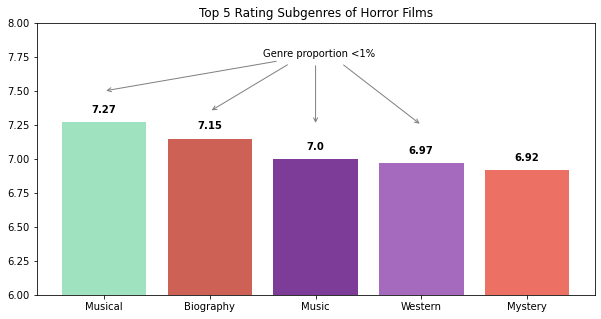

In [462]:
#Top 5 Rating Subgenres of Horror Films
plt.figure(figsize=(10,5))
c = Genre_Rating_top5['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_Rating_top5.Genre,Genre_Rating_top5.avg_rating, color = c )
plt.ylim(6,8)
plt.title('Top 5 Rating Subgenres of Horror Films')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_Rating_top5.avg_rating[i]),
             ha='center',
             weight='bold')
    i+=1
plt.annotate('Genre proportion <1%',xy = (0,7.5),
            xytext=(1.5,7.75),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (1,7.35),
            xytext=(1.75,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (2,7.25),
            xytext=(2,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (3,7.25),
            xytext=(2.25,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)

plt.show()

### 2.2.2 Rating of Top 5 popular Subgenres of Horror Films

In [463]:
Genre_Rating_count = Genre_Rating[Genre_Rating.Genre.isin(['Horror']) == False]
Genre_Rating_count = Genre_Rating_count[Genre_Rating_count.Genre.isin(['Thriller','Mystery','Drama','Sci-Fi','Fantasy']) == True].reset_index().drop(columns='index')
Genre_Rating_count

,Genre,avg_rating
0,Mystery,6.92
1,Thriller,6.86
2,Drama,6.78
3,Sci-Fi,6.74
4,Fantasy,6.42


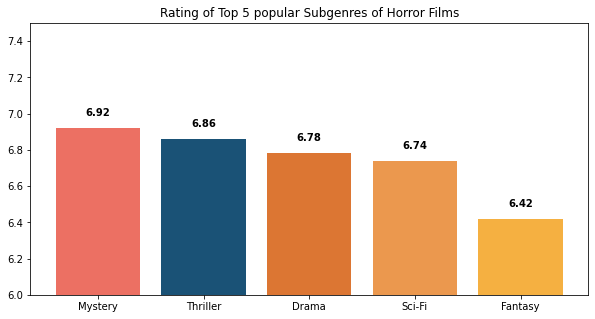

In [464]:
#Top 5 Rating Subgenres of Horror Films
plt.figure(figsize=(10,5))
c = Genre_Rating_count['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_Rating_count.Genre,Genre_Rating_count.avg_rating, color = c )
plt.ylim(6,7.5)
plt.title('Rating of Top 5 popular Subgenres of Horror Films')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_Rating_count.avg_rating[i]),
             ha='center',
             weight='bold')
    i+=1

plt.show()

## 3. Reviewer Portrait
We would like to summarize the characteristics of horror movie viewers and make a reviewer portrait. Our reviewer portrait will include the reviewers’ ages and genders.

### 3.1. Age

Due to reasons like film rating system, the scoring data of some movies by age group is missing, so only the data of 723 movies are analyzed.

In [465]:
age_group = pd.read_csv('/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/age_group_723.csv')
age_group.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/age_group_723.csv'

To study horror movie reviewers of different age groups

#### 3.1.1. Reviewer Age Distribution
By using the bar chart, we can first demonstrate the age distribution of horror movie reviewers with age group on the horizontal axis and the corresponding counts on the vertical axis.

In [466]:
age_group_number_sum = pd.DataFrame({"Number": age_group[['Number_<18','Number_18-29','Number_30-44','Number_45+']].sum(axis=0)})
age_group_number_sum = age_group_number_sum.rename(index={'Number_<18': "Age<18", 'Number_18-29': "18-29", 'Number_30-44': "30-44",'Number_45+':"Age>44"})
age_group_number_sum

,Number
Age<18,33096
18-29,9924324
30-44,31255041
Age>44,9039414


Text(0.5, 1.0, 'Age Distribution of Reviewers')

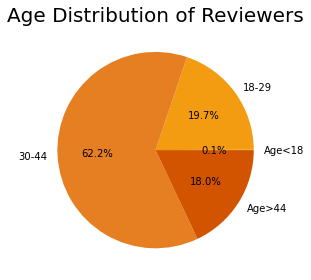

In [467]:
fig, ax = plt.subplots(1,1,figsize = (8,4), tight_layout = True)
ax.pie(
    x = age_group_number_sum['Number'],
    labels = age_group_number_sum.index,
    autopct='%1.1f%%',
    colors = ['#F1C40F', '#F39C12', '#E67E22', '#D35400'])
plt.title('Age Distribution of Reviewers', size = 20)

#### 3.1.2. Rating Tendency by Age
Then we will use sub-bar plots to cross-analyze whether different age groups have different film-rating tendencies.

##### 3.1.2.1. Sub-bar Plot


Text(0.5, 0, 'Ratings')

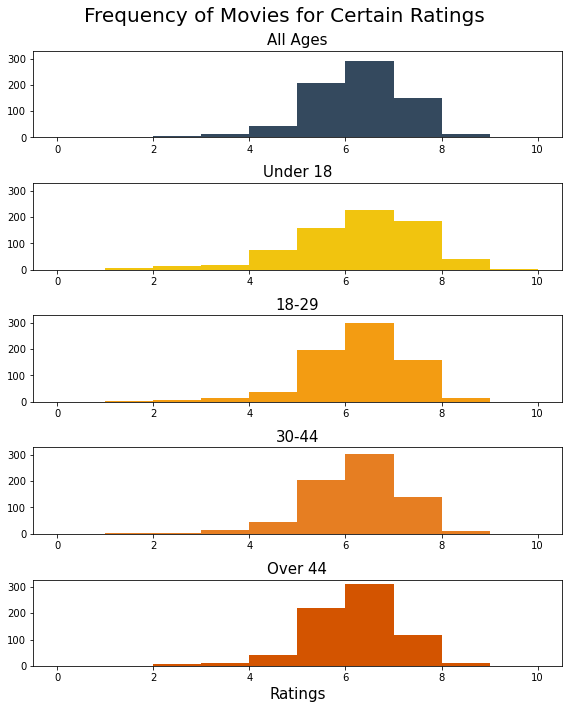

In [468]:
fig, axs = plt.subplots(5, 1, sharey=True, tight_layout=True,figsize=(8, 10))
# '#F1C40F', '#F39C12', '#E67E22', '#D35400'
axs[0].hist(age_group['Rate_All Ages'],range = [0, 10],bins = 10,density = False, color = '#34495E')
axs[0].set_title('All Ages', size = 15)
axs[1].hist(age_group['Rate_<18'],range = [0, 10],bins = 10,density = False, color = '#F1C40F')
axs[1].set_title('Under 18', size = 15)
axs[2].hist(age_group['Rate_18-29'],range = [0, 10],bins = 10,density = False, color = '#F39C12')
axs[2].set_title('18-29', size = 15)
axs[3].hist(age_group['Rate_30-44'],range = [0, 10],bins = 10,density = False, color = '#E67E22')
axs[3].set_title('30-44', size = 15)
axs[4].hist(age_group['Rate_45+'],range = [0, 10],bins = 10,density = False, color = '#D35400')
axs[4].set_title('Over 44', size = 15)
fig.suptitle('Frequency of Movies for Certain Ratings', size = 20)
plt.xlabel("Ratings", size = 15)

##### 3.1.2.2. Bar Chart
with different age groups on the horizontal axis and their mean ratings on the vertical axis


In [469]:
age_group_number_mean = pd.DataFrame({"Average Rating": age_group[['Rate_All Ages','Rate_<18','Rate_18-29','Rate_30-44','Rate_45+']].mean(axis=0)})
age_group_number_mean = age_group_number_mean.rename(index={'Rate_All Ages':'All Ages','Rate_<18': "Rate<18", 'Rate_18-29': "18-29", 'Rate_30-44': "30-44",'Rate_45+':"Age>44"})
age_group_number_mean

,Average Rating
All Ages,6.205394
Rate<18,6.205256
18-29,6.248548
30-44,6.167635
Age>44,6.142877


Text(0.5, 1.0, 'Average Ratings of Different Age Groups')

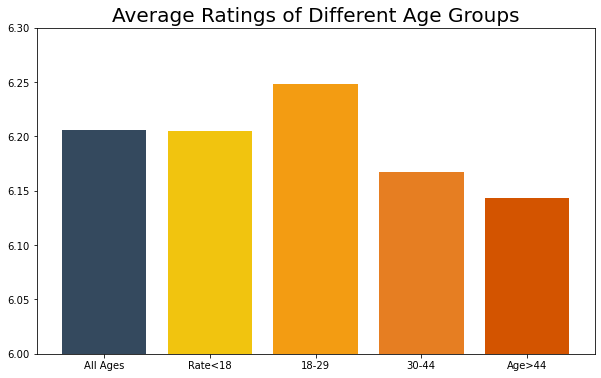

In [470]:
color = ['#34495E', '#F1C40F', '#F39C12', '#E67E22', '#D35400']
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.bar(
    x = age_group_number_mean.index,
    height = age_group_number_mean['Average Rating'],
    color = color
    )
plt.ylim([6,6.3])
plt.title("Average Ratings of Different Age Groups", size = 20)

### 3.2. Gender

#### 3.2.1. Reviewer Gender Ratio
First, we want to use a pie chart to show the gender ratio of horror movie reviewers.

In [471]:
gender_ratio = pd.DataFrame({"Number": [female['Number_Female'].sum(axis=0),male['Number_Male'].sum(axis=0)]},
                            index=['Female','Male'])
gender_ratio

,Number
Female,8764216
Male,43032012


Text(0.5, 1.0, 'Gender Ratio of Reviewers')

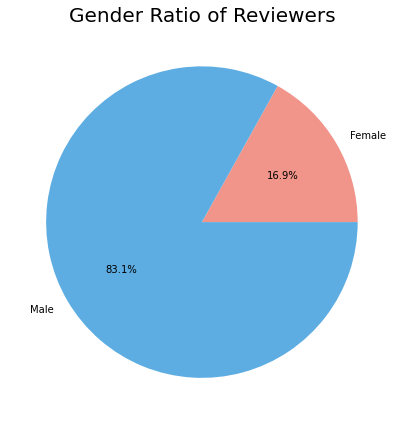

In [472]:
fig, ax = plt.subplots(1,1,figsize = (10,6), tight_layout = True)
color = ['#F1948A', '#5DADE2']
ax.pie(
    x = gender_ratio['Number'],
    labels = gender_ratio.index,
    autopct='%1.1f%%',
    colors = color)
plt.title('Gender Ratio of Reviewers', size = 20)

#### 3.2.2. Rating Tendency by Gender
Similarly, we will use bar plots to display the rating tendencies of each gender. 

##### 3.2.2.1. Sub-bar Plot 1(movie frequency)
like 3.1.2.1, value_count rate, rate_male and rate_female, y axis be proportion

Text(0.5, 0, 'Ratings')

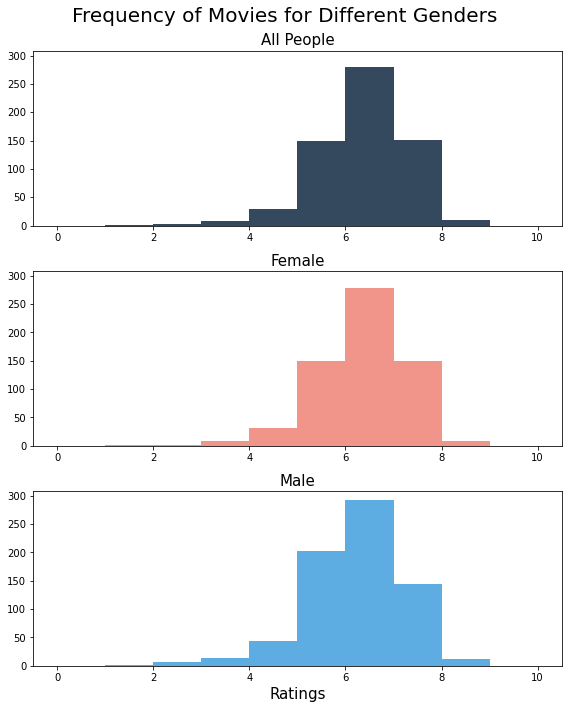

In [473]:
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True,figsize=(8, 10))
axs[0].hist(female['Rating'],range = [0, 10],bins = 10,density = False, color = '#34495E')
axs[0].set_title('All People', size = 15)
axs[1].hist(female['Rate_Female'],range = [0, 10],bins = 10,density = False, color = '#F1948A')
axs[1].set_title('Female', size = 15)
axs[2].hist(male['Rate_Male'],range = [0, 10],bins = 10,density = False, color = '#5DADE2')
axs[2].set_title('Male', size = 15)
fig.suptitle('Frequency of Movies for Different Genders', size = 20)
plt.xlabel("Ratings", size = 15)

##### 3.2.2.2. Sub-bar Plot 2(people number frequency)
like 3.1.2.1 but sum vote1~10 for male, female and all, y axis be proportion

In [474]:
vote = pd.DataFrame(all_rate[['vote1','vote2','vote3','vote4','vote5','vote6','vote7','vote8','vote9','vote10']].sum(axis=0)).reset_index(drop=True)
vote = pd.concat([vote,
                 pd.DataFrame(female[['vote1f','vote2f','vote3f','vote4f','vote5f','vote6f','vote7f','vote8f','vote9f','vote10f']].sum(axis=0)).reset_index(drop=True)
                 ],axis=1)
vote = pd.concat([vote,
                 pd.DataFrame(male[['vote1m','vote2m','vote3m','vote4m','vote5m','vote6m','vote7m','vote8m','vote9m','vote10m']].sum(axis=0)).reset_index(drop=True)
                 ],axis=1)
vote.index = np.arange(1, len(vote) + 1)
vote = vote.T.reset_index(drop=True).T
vote['All People Proportion']=(vote[0]/sum(vote[0]))*100
vote['Female Proportion']=(vote[1]/sum(vote[1]))*100
vote['Male Proportion']=(vote[2]/sum(vote[2]))*100
vote.rename(columns = {
    0 : 'All People Num',
    1 : 'Female Num',
    2 : 'Male Num'
    })


,All People Num,Female Num,Male Num,All People Proportion,Female Proportion,Male Proportion
1,1969204,261195,1163609,2.833597,2.980244,2.704054
2,1343036,175725,822070,1.932569,2.005028,1.910368
3,2106162,259135,1317922,3.030674,2.956739,3.062655
4,3663505,446345,2317260,5.271621,5.092811,5.384968
5,7149592,866972,4551503,10.287946,9.892180,10.577016
6,12365797,1447550,7914354,17.793833,16.516594,18.391782
7,16073705,1892304,10165015,23.129348,21.591252,23.621984
8,12668376,1586323,7796295,18.229231,18.099999,18.117431
9,5954108,828134,3539765,8.567697,9.449037,8.225888
10,6201361,1000533,3444219,8.923483,11.416115,8.003853


Text(0.5, 0, 'Rating Scores')

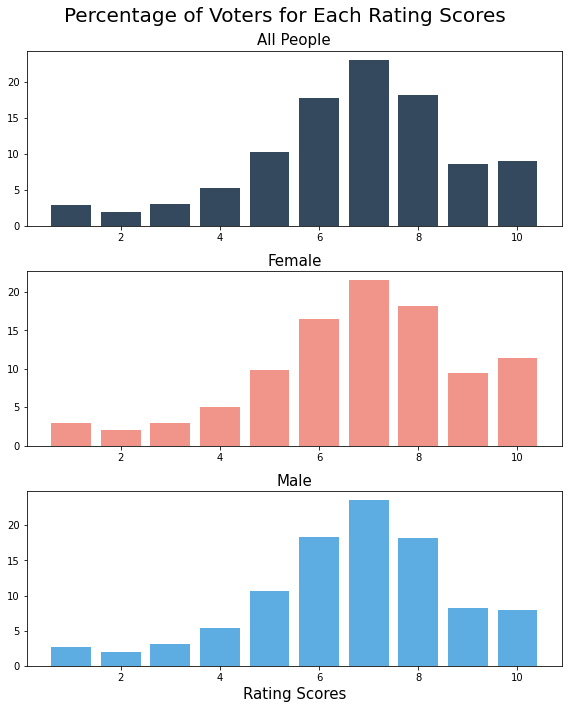

In [475]:
fig, axs = plt.subplots(3, 1, sharey=False, tight_layout=True,figsize=(8, 10))
axs[0].bar(vote.index,vote['All People Proportion'], color = '#34495E')
axs[0].set_title('All People', size = 15)
axs[1].bar(vote.index,vote['Female Proportion'], color = '#F1948A')
axs[1].set_title('Female', size = 15)
axs[2].bar(vote.index,vote['Male Proportion'], color = '#5DADE2')
axs[2].set_title('Male', size = 15)
fig.suptitle('Percentage of Voters for Each Rating Scores', size = 20)
plt.xlabel("Rating Scores", size = 15)

##### 3.2.2.3. Bar Chart
with different genders on the horizontal axis and their mean ratings on the vertical axis


In [476]:
gender_rate_mean = pd.DataFrame({"Average Rating": all_rate[['Rating']].mean()})
gender_rate_mean = pd.concat([gender_rate_mean,
                              pd.DataFrame({"Average Rating": female[['Rate_Female']].mean()})
                              ])
gender_rate_mean = pd.concat([gender_rate_mean,
                              pd.DataFrame({"Average Rating": male[['Rate_Male']].mean()})
                              ])                              
gender_rate_mean = gender_rate_mean.rename(index={'Rating':'All People','Rate_Female': "Female", 'Rate_Male': "Male"})
gender_rate_mean

,Average Rating
All People,6.198765
Female,6.314149
Male,6.179609


Text(0.5, 1.0, 'Average Ratings of Different Genders')

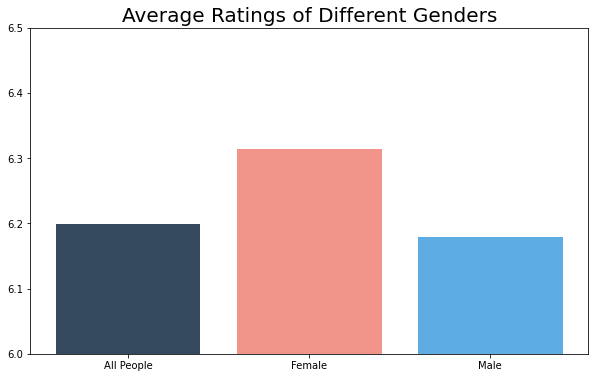

In [477]:
color = ['#34495E', '#F1948A', '#5DADE2']
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.bar(
    x = gender_rate_mean.index,
    height = gender_rate_mean['Average Rating'],
    color = color
    )
plt.ylim([6,6.5])
plt.title("Average Ratings of Different Genders", size = 20)

## 4. Which Country Produces High-Rated Horror Movies the Most?
To analyze which country produces the most high-rated horror films, we produced bar plots for each country to count the number of films by rating value. In each plot, the x-axis and y-axis will be film rating values and counts of films, respectively. The figures then could help us to answer questions such as whether the US produced more horror movies rated over 4 or below 3, or whether Germany released more low-rated movies than Japan.

In [478]:
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name', ascending=False).reset_index().rename(columns={'Name' : 'Count'})

In [479]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = int(y_value) if y_value > 0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

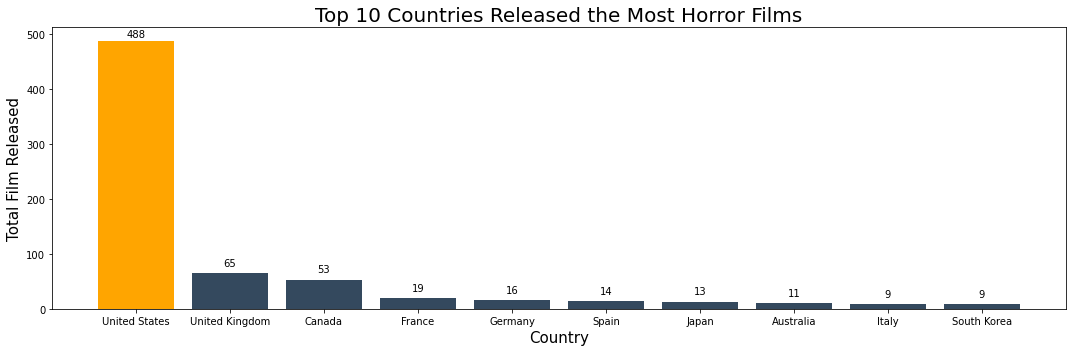

In [480]:
# plot
fig, ax =plt.subplots(1,1,tight_layout=True,figsize = (15,5))
clrs = ['orange' if (a == max(gb_country[:10]['Count'])) else '#34495E' for a in gb_country[:10]['Count']]
ax.bar(
    x = gb_country[:10]['Country'],
    height = gb_country[:10]['Count'],
    color = clrs)
ax.set_xlabel("Country", size = 15)
ax.set_ylabel('Total Film Released', size = 15)
plt.title('Top 10 Countries Released the Most Horror Films', size = 20)
add_value_labels(ax)

Because the difference of total horror films released is not significant among countries other than the top 3, we combined those countries together when calculating the proportion.

In [481]:
country_top_proportion = pd.DataFrame({
    'country' : [
        gb_country['Country'][0],
        gb_country['Country'][1],
        gb_country['Country'][2],
        'Other'],
    'proportion' : [
        gb_country['Count'][0],
        gb_country['Count'][1],
        gb_country['Count'][2],
        gb_country['Count'][3:].sum()]
})

Text(0.5, 1.0, 'Proportion of Released Horror Films by Country')

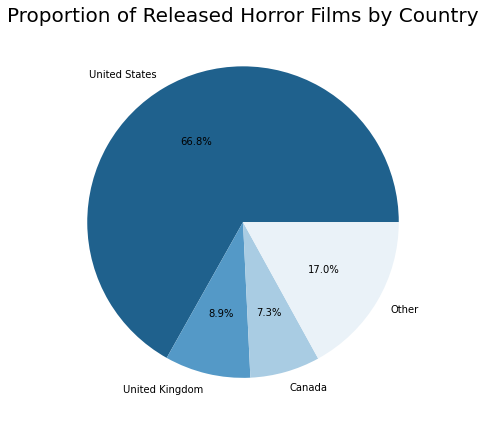

In [482]:
fig, ax = plt.subplots(1,1,figsize = (10,6), tight_layout = True)
clrs = [
    '#1F618D',
    '#5499C7',
    '#A9CCE3',
    '#EAF2F8']
ax.pie(
    x = country_top_proportion['proportion'],
    labels = country_top_proportion['country'],
    autopct='%1.1f%%',
    colors = clrs)
plt.title('Proportion of Released Horror Films by Country', size = 20)

Here, we plot the top 5 countries that release the most horror films: the United States, the United Kingdom, Canada, France, and Germany.

In [483]:
def add_pct_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is greater than 0.5: Adjust label location
        if y_value > 0.5:
            space = spacing - 20
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "{:.2%}".format(y_value) if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

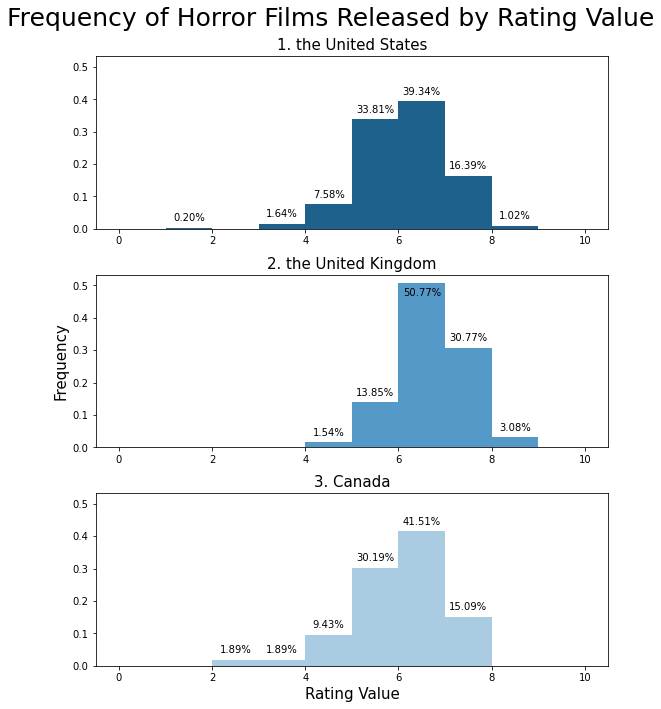

In [484]:
fig, ax = plt.subplots(3, 1, sharey=True, tight_layout=True,figsize=(8, 10))
fig.suptitle('Frequency of Horror Films Released by Rating Value', size = 25)
plt.xlabel("Rating Value", size = 15)

# 1. US
ax[0].hist(mainpage.query('Country == "United States"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#1F618D')
ax[0].set_title("1. the United States", size = 15)
add_pct_labels(ax[0])

# 2. UK
ax[1].hist(mainpage.query('Country == "United Kingdom"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#5499C7')
ax[1].set_title("2. the United Kingdom", size = 15)
ax[1].set_ylabel("Frequency", size = 15)
add_pct_labels(ax[1])

# 3. Canada
ax[2].hist(mainpage.query('Country == "Canada"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#A9CCE3')
ax[2].set_title("3. Canada", size = 15)
add_pct_labels(ax[2])

## 5. Budge and Box Office


### 5.1. Are the Most Profitable Films Also Highest-Rated?
1. Calulate "Revenue"
2. find top 20 films with highest revenue
3. compare with 20 top rated films

We want to obtain the difference between gross worldwide box office and budget (“revenue”) of the 723 movies, find the 20 movies with the highest revenue, and compare them with the 20 highest rated movies to analyze the relationship between the revenue and ratings. 

In [485]:
budget = pd.merge(budget_read, ranking, on=['Name', 'Year'])
budget['Revenue'] = budget['Gross Worldwide'] - budget['Budget']
budget = budget.rename(columns={"Rank" : "Rank by Rating"}).sort_values(by = 'Revenue', ascending = False).set_index("Name").reset_index()
budget["Rank by Revenue"] = budget.index + 1
budget[['Name', 'Year', 'Rank by Rating', 'Rank by Revenue', 'Rate', 'Revenue']].set_index("Rank by Revenue").head(10)

,Name,Year,Rank by Rating,Rate,Revenue
Rank by Revenue,,,,,
1,It,2017,83,7.3,666796444
2,Hotel Transylvania 3: Summer Vacation,2018,346,6.3,448583774
3,The Exorcist,1973,11,8.0,430306145
4,The Meg,2018,548,5.6,400438278
5,Hotel Transylvania 2,2015,210,6.7,395186706
6,It Chapter Two,2019,266,6.5,394093228
7,World War Z,2013,149,7.0,350455876
8,The Nun,2018,609,5.3,343551694
9,A Quiet Place,2018,47,7.5,323952971


### 5.2. Which Genre Is The Most Profitable?
We will also cross-analyze the ranking based on revenue with the movies genre to see what type of horror movies people prefer to go to the movie theater.

In [486]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

budget["Genre_list"] = budget.apply(lambda x : stringToList(x["Genre"]),axis=1)

In [487]:
# Function to Calculate Average Revenue by Genre
def genre_avgRev (genre):
    total_rev=0
    count=0
    for list in budget["Genre_list"]:
        i = budget["Genre_list"].tolist().index(list)
        if genre in list:
            total_rev = total_rev + budget["Revenue"][i]
            count += 1
    return float("{:.2f}".format(total_rev / count))

In [488]:
# get average revenue of each film genre
a = pd.Series(np.concatenate(budget.Genre_list)).value_counts().index.tolist()
b = pd.DataFrame({'Genre' : a})
b['avg_rev'] = ""
for genre in b['Genre']:
    i = b['Genre'].tolist().index(genre)
    b['avg_rev'][i] = genre_avgRev(genre)
avg_rev = b.sort_values(by='avg_rev', ascending=False).reset_index().drop(columns="index")

In [495]:
def add_toprev_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "${:.2}b".format(y_value/1000000000) #if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

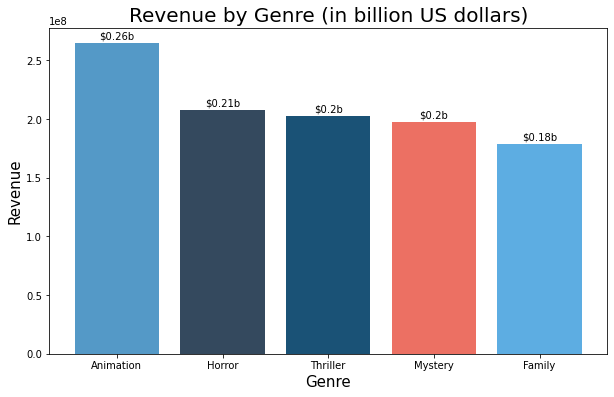

In [496]:
# plot
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("Revenue by Genre (in billion US dollars)", size = 20)
ax.set_xlabel('Genre', size = 15)
ax.set_ylabel('Revenue', size = 15)
#clrs = ['orange' if (x == 'Horror') else 'grey' for x in c['Genre'] ]
dd = avg_rev['Genre'].apply(lambda x: colors_list[x])
ax.bar(avg_rev['Genre'][:5], height = avg_rev['avg_rev'][:5], color=dd)
add_toprev_labels(ax)
plt.show()

In [491]:
def add_bottomrev_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "${:.2}m".format(y_value/1000000) #if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

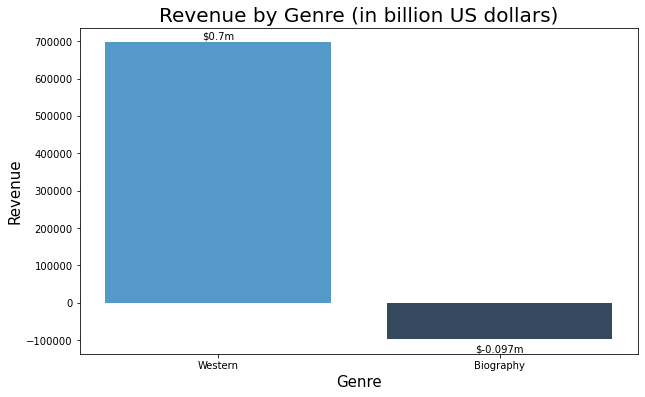

In [492]:
# plot
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("Revenue by Genre (in billion US dollars)", size = 20)
ax.set_xlabel('Genre', size = 15)
ax.set_ylabel('Revenue', size = 15)
ax.bar(avg_rev['Genre'][-2:], height = avg_rev['avg_rev'][-2:], color = dd)
add_bottomrev_labels(ax)
plt.show()